## 1) Faire une analyse du jeu de données correspondant au classement des 50 meilleures universités en 2016.

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('./datasets/timesData.csv')

* #### Les cinq premiers enregistrements du dataframe df

In [330]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


* #### Les différentes colonnes du dataframe df

In [331]:
df.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [332]:
for x in df:
  print(x)

world_rank
university_name
country
teaching
international
research
citations
income
total_score
num_students
student_staff_ratio
international_students
female_male_ratio
year


* #### Le nom des colonnes qui ont des valeurs nulles ainsi que leur nombre

In [333]:
df.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [334]:
df.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


## 2) Préparation des données et affichage des cinquantes premières universités mondiales en 2016

In [335]:
# J'initialise df_2016 avec le tableau df

# Sort by year 2016 and display the first fifty lines
df_2016 = df[df.year == 2016].iloc[:50,:]
#df_2016

* #### La visualisation du dataframe montre des valeurs à corriger dans certaines colonnes

In [336]:
# On vire les lignes contenant avec des valeurs "null",NaN df_2016 pour appliquer 
# une matrice de corrélation
df_2016 = df_2016.dropna()


# Enlever le signe = de la colonne world rank
# df_2016['world_rank'] = df_2016['world_rank'].replace(['=39'],'39')
# df_2016['world_rank'] = df_2016['world_rank'].replace(['=44'],'44')
# df_2016['world_rank'] = df_2016['world_rank'].replace(['=47'],'47')
df_2016.world_rank = [int(each.replace('=','')) for each in df_2016.world_rank]

#df_2016.num_students = df_2016.num_students.replace(',', '')
#df_2016.num_students = [str(each).replace(',', '.') for each in df_2016.num_students]
#df_2016.num_students = pd.to_numeric(df_2016.num_students, errors='coerce')
df_2016['num_students'] = [float(each.replace(',','.')) for each in df_2016.num_students]


#dfValue = df_2016
df_2016.income = pd.to_numeric(df_2016.income, errors='coerce')
#df_2016.world_rank = pd.to_numeric(df_2016.world_rank, errors='coerce')
df_2016.international = pd.to_numeric(df_2016.international, errors='coerce')
df_2016.total_score = pd.to_numeric(df_2016.total_score, errors='coerce')

# Nettoyage des données colonne international_students
df_2016.international_students = df_2016.international_students.str.replace(r'%', r'.0').astype('float') / 100
df_2016.international_students = pd.to_numeric(df_2016.international_students, errors='coerce')

#df_2016.female_male_ratio = [(float(each[0]) / float(each[2])) for each in df_2016.female_male_ratio] 
#Convertir la colonne
def convertFR (x):
    a, b = x.split(':')
    c = int(a)/int(b)
    return c

df_2016.female_male_ratio = df_2016['female_male_ratio'].apply(convertFR)



# Virer les colonnes year, university_name, country
# df_2016.drop(['year', 'university_name', 'country'], axis = 1)
del df_2016['year']
del df_2016['university_name']
del df_2016['country']

# Affichage
df_2016

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
1803,1,95.6,64.0,97.6,99.8,97.8,95.2,2.243,6.9,0.27,0.492537
1804,2,86.5,94.4,98.9,98.8,73.1,94.2,19.919,11.6,0.34,0.851852
1805,3,92.5,76.3,96.2,99.9,63.3,93.9,15.596,7.8,0.22,0.724138
1806,4,88.2,91.5,96.7,97.0,55.0,92.8,18.812,11.8,0.34,0.851852
1807,5,89.4,84.0,88.6,99.7,95.4,92.0,11.074,9.0,0.33,0.587302
1809,7,85.1,78.5,91.9,99.3,52.1,90.1,7.929,8.4,0.27,0.818182
1810,8,83.3,96.0,88.5,96.7,53.7,89.1,15.060,11.7,0.51,0.587302
1811,9,77.0,97.9,95.0,91.1,80.0,88.3,18.178,14.7,0.37,0.449275
1812,10,85.7,65.0,88.9,99.2,36.6,87.9,14.221,6.9,0.21,0.724138
1813,11,77.6,70.0,90.4,98.2,100.0,87.6,15.128,3.6,0.23,1.000000


In [337]:
#df_2016.head(50)

<AxesSubplot:>

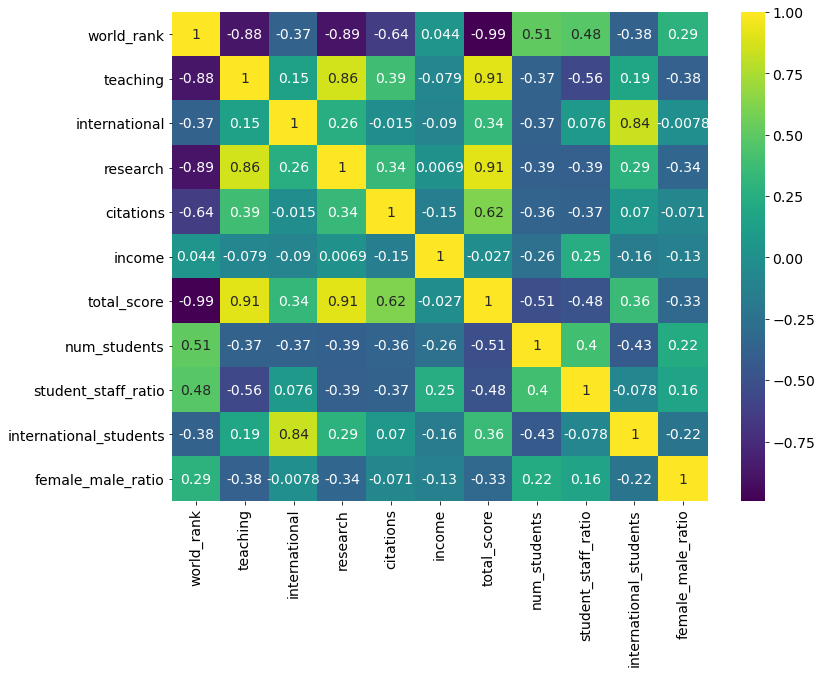

In [338]:
# On peut afficher une belle matrice de corrélation colorée et informative

df_2016.to_numpy()
fig_size = (12,9)
fig , ax = plt.subplots(figsize = fig_size)
sns.heatmap(df_2016.corr(), annot=True, cbar = True, cmap ='viridis') #Pearson #Spearman #Kendall

## 2) Préparation des données

In [339]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1803 to 1852
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              43 non-null     int64  
 1   teaching                43 non-null     float64
 2   international           43 non-null     float64
 3   research                43 non-null     float64
 4   citations               43 non-null     float64
 5   income                  43 non-null     float64
 6   total_score             43 non-null     float64
 7   num_students            43 non-null     float64
 8   student_staff_ratio     43 non-null     float64
 9   international_students  43 non-null     float64
 10  female_male_ratio       43 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 4.0 KB


In [340]:
from sklearn.preprocessing import StandardScaler
X = df_2016
sc = StandardScaler()
sc_fit = sc.fit_transform(X)
print(sc_fit)

n = X.shape[0]
p = X.shape[1]

[[-1.69488978e+00  2.11596932e+00 -2.94123563e-01  1.71867529e+00
   8.70722264e-01  1.60530508e+00  1.91163289e+00 -1.82793839e+00
  -9.37150765e-01  2.47360430e-01 -1.42597214e+00]
 [-1.62426937e+00  1.29732309e+00  1.30387445e+00  1.85473810e+00
   7.53131004e-01  4.60706179e-01  1.78156926e+00 -4.38072223e-01
  -2.51918603e-01  8.78339155e-01 -4.15245734e-01]
 [-1.55364896e+00  1.83708983e+00  3.52434843e-01  1.57214611e+00
   8.82481390e-01  6.57381916e-03  1.74255017e+00 -7.77990272e-01
  -8.05936096e-01 -2.03338659e-01 -7.74495969e-01]
 [-1.48302856e+00  1.45025700e+00  1.15143385e+00  1.62447796e+00
   5.41466735e-01 -3.78048485e-01  1.59948018e+00 -5.25115776e-01
  -2.22759788e-01  8.78339155e-01 -4.15245734e-01]
 [-1.41240815e+00  1.55821035e+00  7.57190919e-01  7.76702003e-01
   8.58963138e-01  1.49408900e+00  1.49542927e+00 -1.13355572e+00
  -6.30983203e-01  7.88199337e-01 -1.15940693e+00]
 [-1.27116733e+00  1.17137752e+00  4.68079437e-01  1.12209221e+00
   8.11926634e-01 -

In [341]:
print(X)

      world_rank  teaching  international  research  citations  income  \
1803           1      95.6           64.0      97.6       99.8    97.8   
1804           2      86.5           94.4      98.9       98.8    73.1   
1805           3      92.5           76.3      96.2       99.9    63.3   
1806           4      88.2           91.5      96.7       97.0    55.0   
1807           5      89.4           84.0      88.6       99.7    95.4   
1809           7      85.1           78.5      91.9       99.3    52.1   
1810           8      83.3           96.0      88.5       96.7    53.7   
1811           9      77.0           97.9      95.0       91.1    80.0   
1812          10      85.7           65.0      88.9       99.2    36.6   
1813          11      77.6           70.0      90.4       98.2   100.0   
1814          12      86.5           64.3      87.8       97.2    43.3   
1815          13      80.4           61.9      91.1       99.7    47.9   
1816          14      78.1           9

In [342]:
# Nombre d'observations et de variables
X.shape

(43, 11)

In [343]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full')

In [344]:
coord = pca.fit_transform(sc_fit)
print(pca.n_components_)

11


In [345]:
# EigenValue
val_propres = (n-1)/n*pca.explained_variance_
print(val_propres)

[5.05568705e+00 1.78843575e+00 1.29263000e+00 9.49270230e-01
 8.20345173e-01 6.38081085e-01 2.27833603e-01 1.28924664e-01
 9.09869932e-02 7.79433629e-03 1.11139051e-05]


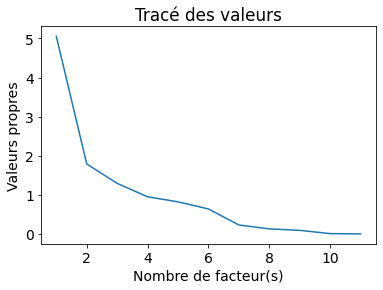

In [346]:
# Coude pour x = 2
plt.plot(np.arange(1, p+1), val_propres)
#plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Tracé des valeurs")
plt.xlabel("Nombre de facteur(s)")
plt.ylabel("Valeurs propres")
plt.show()

In [347]:
# % de variance => % de variance de chaque ligne par rapport au total
print(pca.explained_variance_ratio_)

[4.59607914e-01 1.62585068e-01 1.17511818e-01 8.62972936e-02
 7.45768339e-02 5.80073714e-02 2.07121457e-02 1.17204240e-02
 8.27154484e-03 7.08576026e-04 1.01035501e-06]


Text(0, 0.5, 'cumsum')

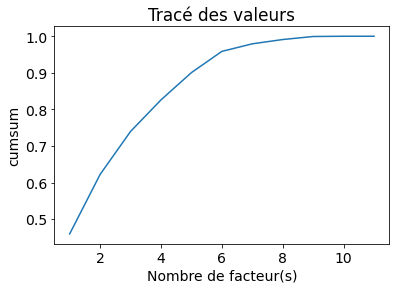

In [348]:
# graph
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Tracé des valeurs")
plt.xlabel("Nombre de facteur(s)")
plt.ylabel("cumsum")

In [351]:
from sklearn.preprocessing import StandardScaler
X = df_2016
sc = StandardScaler()
sc_fit = sc.fit_transform(X)
columns = df_2016.columns.values
#col = X.columns
pca = PCA(n_components=2)
pca.fit(sc_fit)
pca_values=pca.components_
pca.components_

array([[-0.43228671,  0.39327058,  0.17870816,  0.39056327,  0.25971764,
        -0.02873298,  0.43401877, -0.27709026, -0.25464882,  0.21133084,
        -0.17621946],
       [ 0.04948094, -0.19339887,  0.64633395, -0.07726515, -0.23489429,
         0.01364894, -0.07020358, -0.18266479,  0.27767237,  0.6043563 ,
         0.02063886]])

In [356]:
print(columns)

['world_rank' 'teaching' 'international' 'research' 'citations' 'income'
 'total_score' 'num_students' 'student_staff_ratio'
 'international_students' 'female_male_ratio']


https://github.com/williamhuybui/PCA_Variable_Factor_Map/blob/master/variable_factor_map/PCA.ipynb

In [361]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

def pca_map(X, figsize=(10,10), sup="", print_values= False):
    #PCA
    #columns=X.columns.values
    #pca=PCA(n_components=2)
    #pca.fit(X)
    #pca_values=pca.components_
    
    #Plot
    plt.figure(figsize=figsize)
    plt.rcParams.update({'font.size': 14}) 
    
    #Plot circle
    x=np.linspace(start=-1,stop=1,num=500)
    y_positive=lambda x: np.sqrt(1-x**2) 
    y_negative=lambda x: -np.sqrt(1-x**2)
    plt.plot(x,list(map(y_positive, x)), color='maroon')
    plt.plot(x,list(map(y_negative, x)),color='maroon')
    
    #Plot smaller circle
    x=np.linspace(start=-0.5,stop=0.5,num=500)
    y_positive=lambda x: np.sqrt(0.5**2-x**2) 
    y_negative=lambda x: -np.sqrt(0.5**2-x**2)
    plt.plot(x,list(map(y_positive, x)), color='maroon')
    plt.plot(x,list(map(y_negative, x)),color='maroon')
    
    #Create broken lines
    x=np.linspace(start=-1,stop=1,num=30)
    plt.scatter(x,[0]*len(x), marker='_',color='maroon')
    plt.scatter([0]*len(x), x, marker='|',color='maroon')

    #Define color list
    colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
    if len(pca_values[0]) > 6:
        colors=colors*(int(len(pca_values[0])/6)+1)

    #Plot arrow
    add_string=""
    for i in range(len(pca_values[0])):
        xi=pca_values[0][i]
        yi=pca_values[1][i]
        plt.arrow(0,0, 
                  dx=xi, dy=yi, 
                  head_width=0.03, head_length=0.03, 
                  color=colors[i], length_includes_head=True)
        if print_values==True:
            add_string=f" ({round(xi,2)} {round(yi,2)})"
        plt.text(pca_values[0, i], 
                 pca_values[1, i] , 
                 s=columns[i] + add_string )

    plt.xlabel(f"Component 1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
    plt.ylabel(f"Component 2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")
    plt.title('Variable factor map (PCA)')
    plt.suptitle(sup, y=1, fontsize=18)
    plt.show()

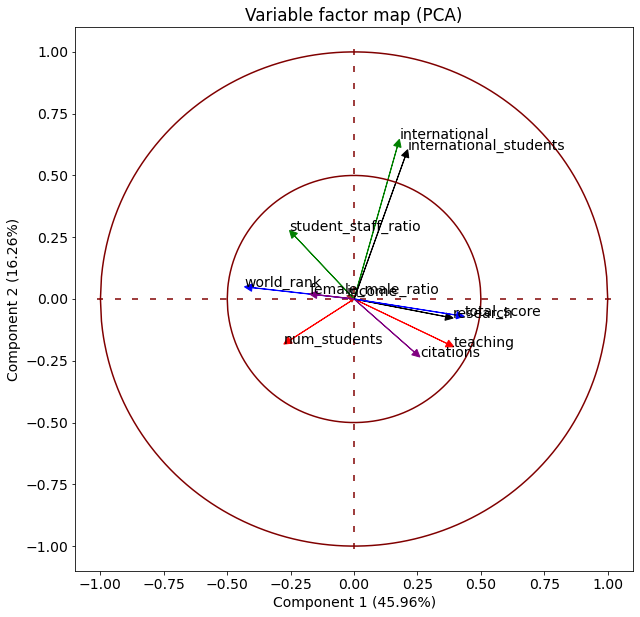

In [362]:
pca_map(sc_fit, figsize=(10,10))